### Work with stock market

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
prices = (yf.download(
    tickers="AAPL", 
    start="2000-01-01", 
    end="2022-12-31", 
    progress=False
  )
  .reset_index()
  .assign(symbol="AAPL")
  .rename(columns={
    "Date": "date", 
    "Open": "open", 
    "High": "high",
    "Low": "low",
    "Close": "close", 
    "Adj Close": "adjusted", 
    "Volume": "volume"}
  )
)
prices.head().round(3)

c:\Apps\Anaconda3\envs\tidy_finance_environment\lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,date,open,high,low,close,adjusted,volume,symbol
0,2000-01-03,0.936,1.004,0.908,0.999,0.845,535796800,AAPL
1,2000-01-04,0.967,0.988,0.903,0.915,0.774,512377600,AAPL
2,2000-01-05,0.926,0.987,0.920,0.929,0.785,778321600,AAPL
3,2000-01-06,0.948,0.955,0.848,0.848,0.717,767972800,AAPL
4,2000-01-07,0.862,0.902,0.853,0.888,0.751,460734400,AAPL


In [3]:
from plotnine import *

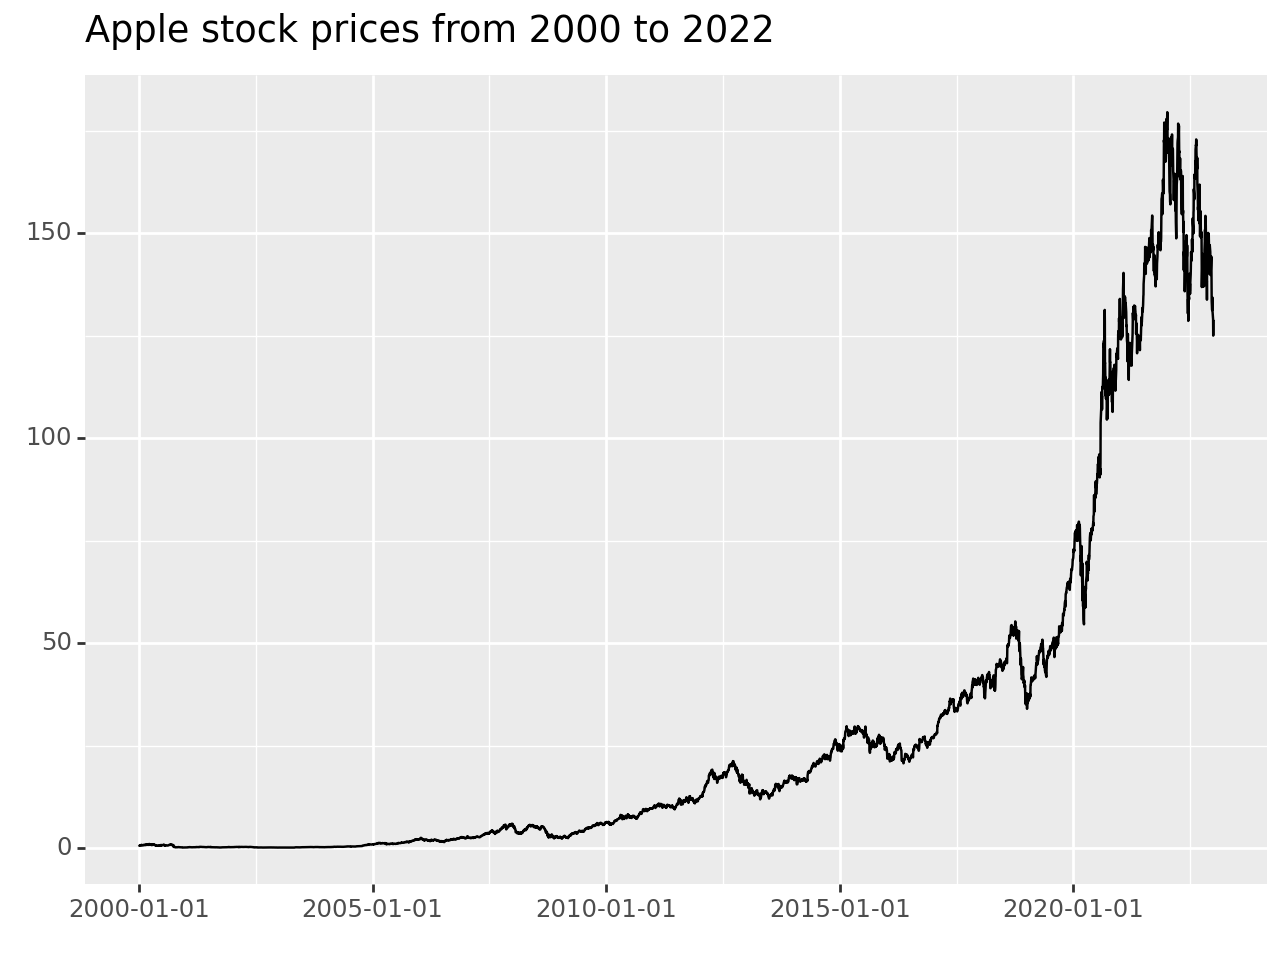

In [4]:
prices_figure = (
  ggplot(prices, 
         aes(y="adjusted", x="date")) +
  geom_line() +
  labs(x="", y="",
       title="Apple stock prices from 2000 to 2022")
)
prices_figure.draw()

In [5]:
returns = (prices
  .sort_values("date")
  .assign(ret=lambda x: x["adjusted"].pct_change())
  .get(["symbol", "date", "ret"])
)

In [6]:
returns = returns.dropna() 

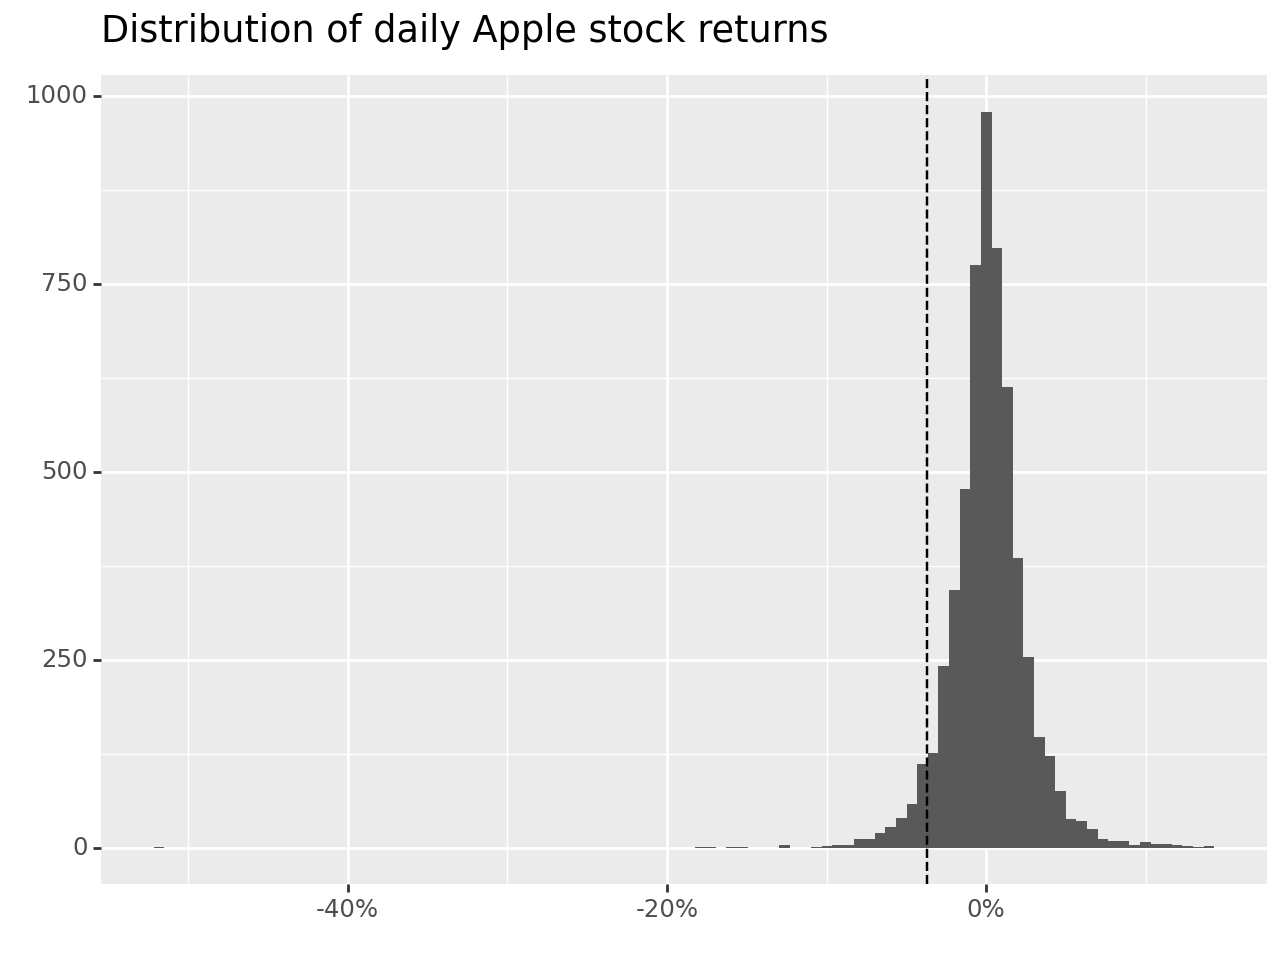

In [7]:
from mizani.formatters import percent_format

quantile_05 = returns["ret"].quantile(0.05)

returns_figure = (
  ggplot(returns, aes(x="ret")) +
  geom_histogram(bins=100) +
  geom_vline(aes(xintercept=quantile_05), 
                 linetype="dashed") +
  labs(x="", y="",
       title="Distribution of daily Apple stock returns") +
  scale_x_continuous(labels=percent_format())
)
returns_figure.draw()

In [8]:
pd.DataFrame(returns["ret"].describe()).round(3).T

,count,mean,std,min,25%,50%,75%,max
ret,5786.0,0.001,0.025,-0.519,-0.01,0.001,0.013,0.139


In [9]:
(returns["ret"]
  .groupby(returns["date"].dt.year)
  .describe()
  .round(3)
)

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2000,251.0,-0.003,0.055,-0.519,-0.034,-0.002,0.027,0.137
2001,248.0,0.002,0.039,-0.172,-0.023,-0.001,0.027,0.129
2002,252.0,-0.001,0.031,-0.150,-0.019,-0.003,0.018,0.085
2003,252.0,0.002,0.023,-0.081,-0.012,0.002,0.015,0.113
2004,252.0,0.005,0.025,-0.056,-0.009,0.003,0.016,0.132
2005,252.0,0.003,0.024,-0.092,-0.010,0.003,0.017,0.091
2006,251.0,0.001,0.024,-0.063,-0.014,-0.002,0.014,0.118
2007,251.0,0.004,0.024,-0.070,-0.009,0.003,0.018,0.105
2008,253.0,-0.003,0.037,-0.179,-0.024,-0.001,0.019,0.139


### Scaling up the analysis 

In [10]:
url = ("https://www.ssga.com/us/en/institutional/etfs/library-content/"
       "products/fund-data/etfs/us/holdings-daily-us-en-dia.xlsx")

symbols = (pd.read_excel(url, skiprows=4, nrows=30)
  .get("Ticker")
  .tolist()
)

In [13]:
index_prices = (yf.download(
    tickers=symbols, 
    start="2000-01-01", 
    end="2022-12-31", 
    progress=False
  ))

index_prices = (index_prices
  .stack()
  .reset_index(level=1, drop=False)
  .reset_index()
  .rename(columns={
    "Date": "date",
    "level_1": "symbol",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Adj Close": "adjusted",
    "Volume": "volume"}
  )
)

c:\Apps\Anaconda3\envs\tidy_finance_environment\lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
c:\Apps\Anaconda3\envs\tidy_finance_environment\lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
c:\Apps\Anaconda3\envs\tidy_finance_environment\lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
c:\Apps\Anaconda3\envs\tidy_finance_environment\lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
c:\Apps\Anaconda3\envs\tidy_finance_environment\

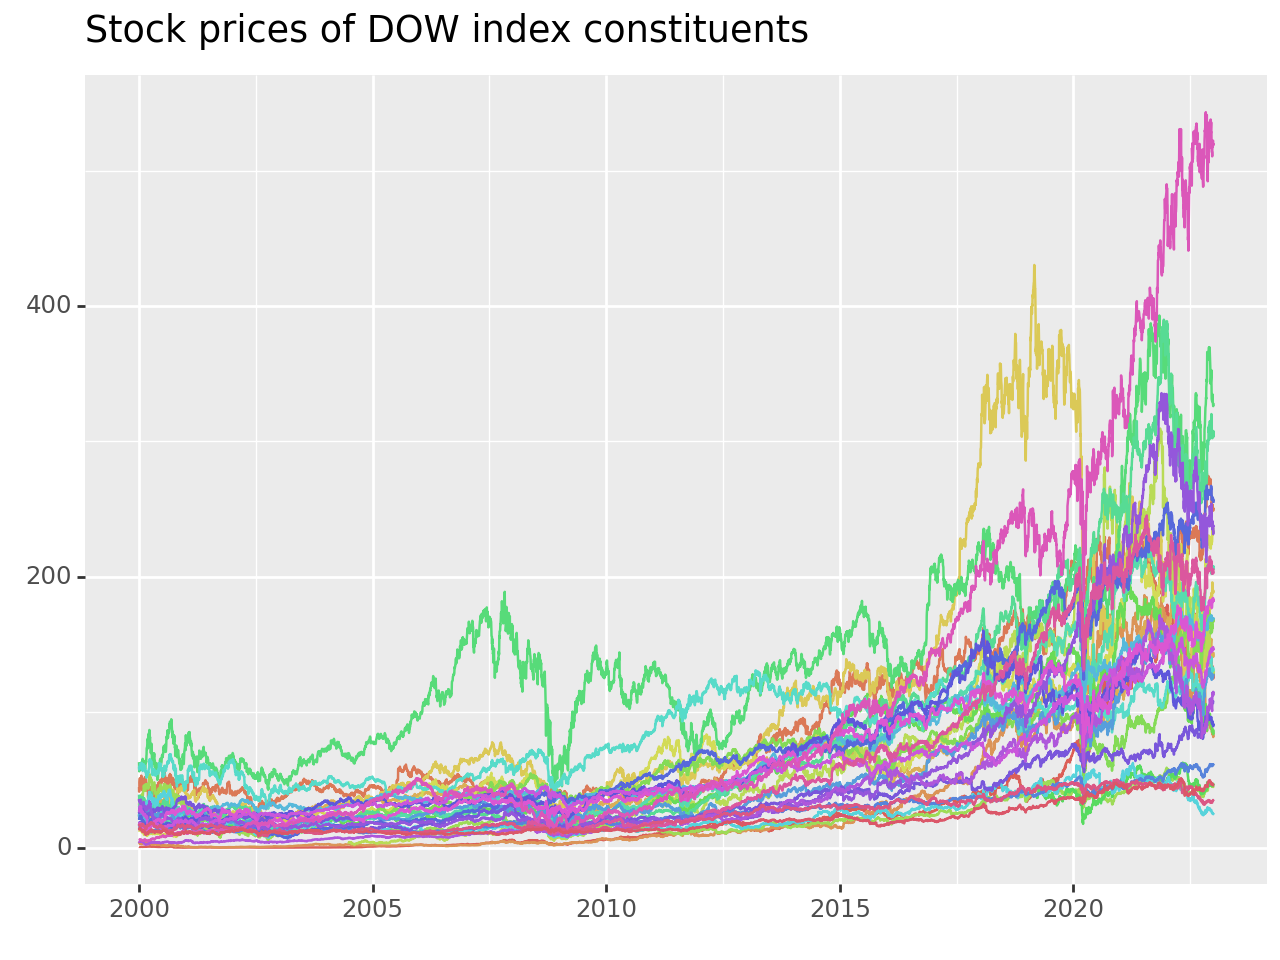

In [15]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

index_prices_figure = (
  ggplot(index_prices, 
         aes(y="adjusted", x="date", color="symbol")) +
 geom_line() +
 labs(x="", y="", color="",
      title="Stock prices of DOW index constituents") +
 theme(legend_position="none") +
 scale_x_datetime(date_breaks="5 years", date_labels="%Y")
)
index_prices_figure.draw()

In [16]:
all_returns = (index_prices
  .assign(ret=lambda x: x.groupby("symbol")["adjusted"].pct_change())
  .get(["symbol", "date", "ret"])
  .dropna(subset="ret")
)

(all_returns
  .groupby("symbol")["ret"]
  .describe()
  .round(3)
)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,5786.0,0.001,0.025,-0.519,-0.010,0.001,0.013,0.139
AMGN,5786.0,0.000,0.020,-0.134,-0.009,0.000,0.009,0.151
AMZN,5786.0,0.001,0.032,-0.248,-0.012,0.000,0.014,0.345
AXP,5786.0,0.001,0.023,-0.176,-0.009,0.000,0.010,0.219
BA,5786.0,0.001,0.022,-0.238,-0.010,0.001,0.011,0.243
CAT,5786.0,0.001,0.020,-0.145,-0.010,0.001,0.011,0.147
CRM,4664.0,0.001,0.027,-0.271,-0.012,0.000,0.014,0.260
CSCO,5786.0,0.000,0.024,-0.162,-0.009,0.000,0.010,0.244
CVX,5786.0,0.001,0.018,-0.221,-0.008,0.001,0.009,0.227


### Other forms of Data Aggregation

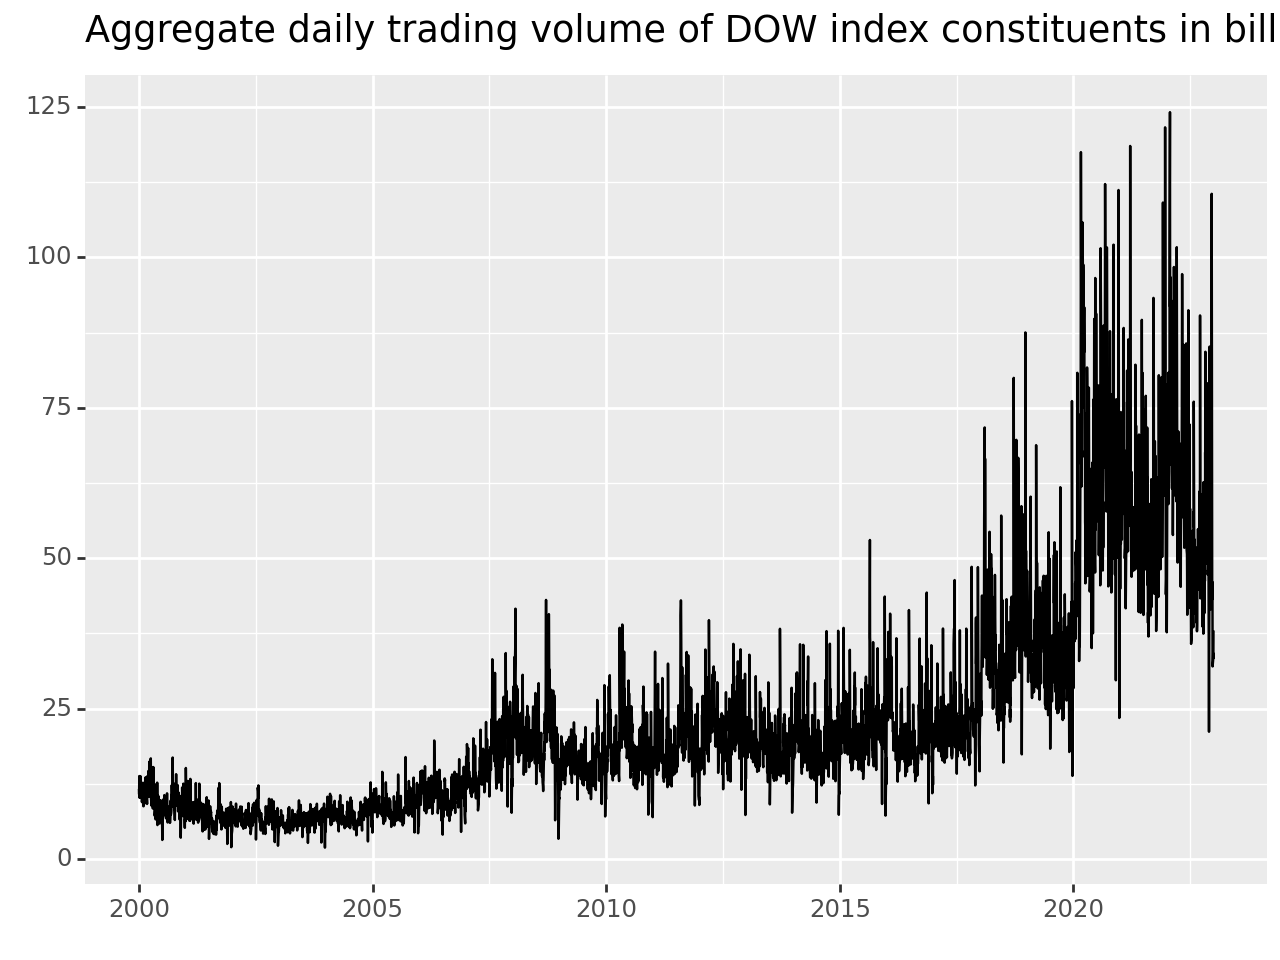

In [17]:
trading_volume = (index_prices
  .assign(trading_volume=lambda x: (x["volume"]*x["adjusted"])/1e9)
  .groupby("date")["trading_volume"]
  .sum()
  .reset_index()
  .assign(trading_volume_lag=lambda x: x["trading_volume"].shift(periods=1))
)

trading_volume_figure = (
  ggplot(trading_volume, 
          aes(x="date", y="trading_volume")) +
  geom_line() +
  labs(x="", y="",
       title=("Aggregate daily trading volume of DOW index constituents "
              "in billion USD"))  +
 scale_x_datetime(date_breaks="5 years", date_labels="%Y")
)
trading_volume_figure.draw()

c:\Apps\Anaconda3\envs\tidy_finance_environment\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


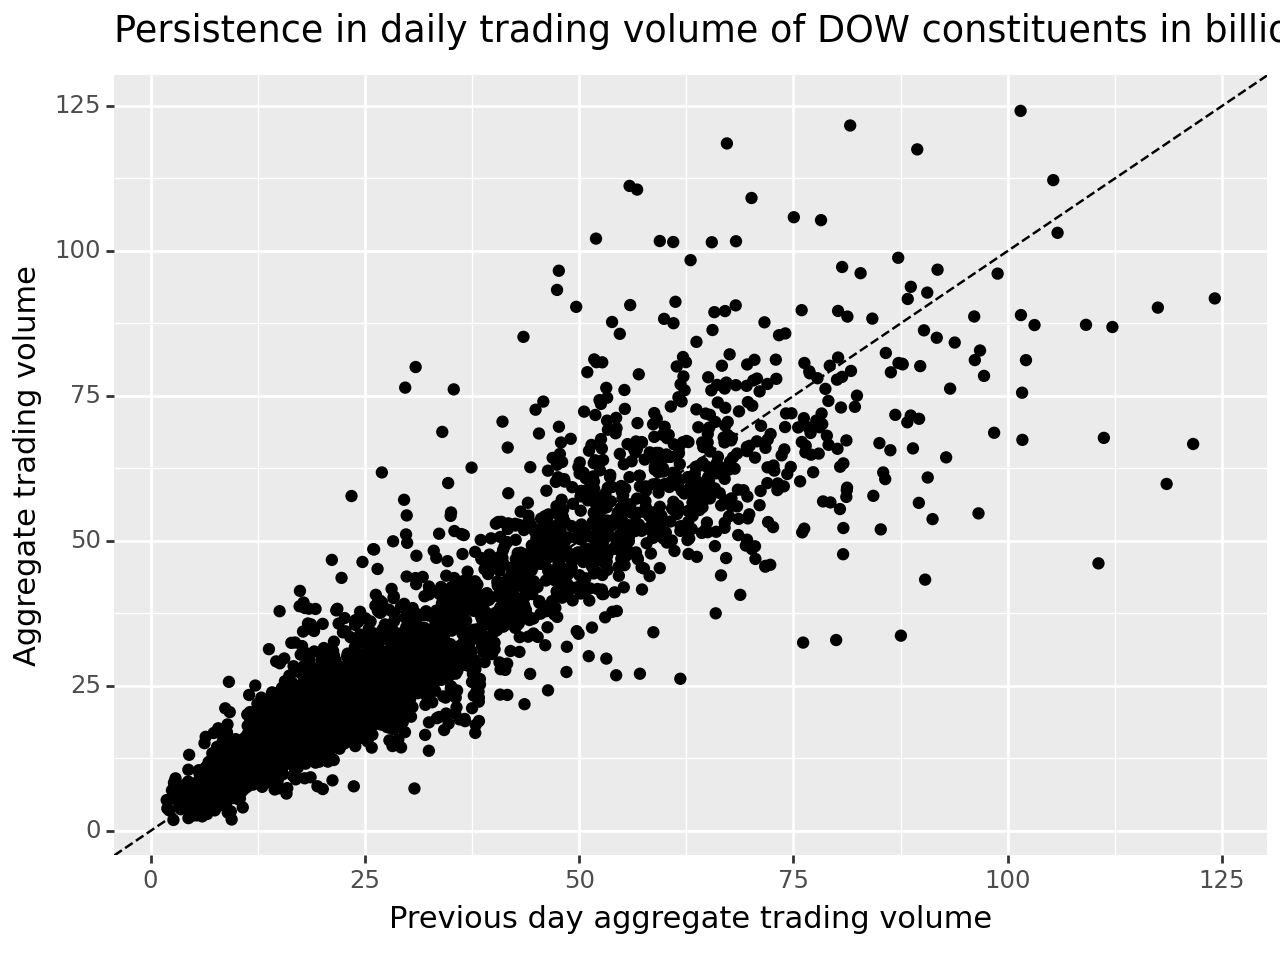

In [18]:
trading_volume_figure = (
  ggplot(trading_volume, 
         aes(x="trading_volume_lag", y="trading_volume")) +
  geom_point() +
  geom_abline(aes(intercept=0, slope=1), linetype="dashed") +
  labs(x="Previous day aggregate trading volume",
       y="Aggregate trading volume",
       title=("Persistence in daily trading volume of DOW constituents "
              "in billion USD"))
)
trading_volume_figure.draw()

### Portfolio Choice Problems

In [19]:
prices = (index_prices
  .groupby("symbol")
  .apply(lambda x: x.assign(counts=x["adjusted"].dropna().count()))
  .reset_index(drop=True)
  .query("counts == counts.max()")
)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4704\250783592.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [21]:
prices

,date,symbol,adjusted,close,high,low,open,volume,counts
0,2000-01-03,AAPL,0.844981,0.999442,1.004464,0.907924,0.936384,535796800.0,5787
1,2000-01-04,AAPL,0.773741,0.915179,0.987723,0.903460,0.966518,512377600.0,5787
2,2000-01-05,AAPL,0.785063,0.928571,0.987165,0.919643,0.926339,778321600.0,5787
3,2000-01-06,AAPL,0.717125,0.848214,0.955357,0.848214,0.947545,767972800.0,5787
4,2000-01-07,AAPL,0.751094,0.888393,0.901786,0.852679,0.861607,460734400.0,5787
...,...,...,...,...,...,...,...,...,...
165588,2022-12-23,WMT,46.880852,47.923332,47.933334,47.426666,47.683334,9547500.0,5787
165589,2022-12-27,WMT,46.893902,47.936668,48.150002,47.730000,48.013332,10044600.0,5787
165590,2022-12-28,WMT,46.072174,47.096668,47.889999,46.970001,47.823334,15246300.0,5787
165591,2022-12-29,WMT,46.352608,47.383331,47.673332,47.250000,47.380001,9171900.0,5787


In [22]:
returns_matrix = (prices
  .pivot(columns="symbol", values="adjusted", index="date")
  .resample("m")
  .last()
  .pct_change()
  .dropna()
)
mu = np.array(returns_matrix.mean()).T
sigma = np.array(returns_matrix.cov())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4704\1604931951.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.


In [24]:
N = returns_matrix.shape[1]
iota = np.ones(N)
sigma_inv = np.linalg.inv(sigma) 

mvp_weights = sigma_inv @ iota
mvp_weights = mvp_weights/mvp_weights.sum()
mvp_return = mu.T @ mvp_weights
mvp_volatility = np.sqrt(mvp_weights.T @ sigma @ mvp_weights)
mvp_moments = pd.DataFrame({"value": [mvp_return, mvp_volatility]},
                           index=["average_ret", "volatility"])
mvp_moments.round(3)

,value
average_ret,0.008
volatility,0.032


In [25]:
benchmark_multiple = 3
mu_bar = benchmark_multiple*mvp_return
C = iota.T @ sigma_inv @ iota
D = iota.T @ sigma_inv @ mu
E = mu.T @ sigma_inv @ mu
lambda_tilde = 2*(mu_bar-D/C)/(E-D**2/C)
efp_weights = mvp_weights+lambda_tilde/2*(sigma_inv @ mu-D*mvp_weights)

### The efficient frontier 

In [26]:
length_year = 12
a = np.arange(-0.4, 2.0, 0.01)
res = pd.DataFrame(columns=["mu", "sd"], index=a).astype(float)

for i in a:
    w = (1-i)*mvp_weights+i*efp_weights
    res.loc[i, "mu"] = (w.T @ mu)*length_year
    res.loc[i, "sd"] = np.sqrt(w.T @ sigma @ w)*np.sqrt(length_year)

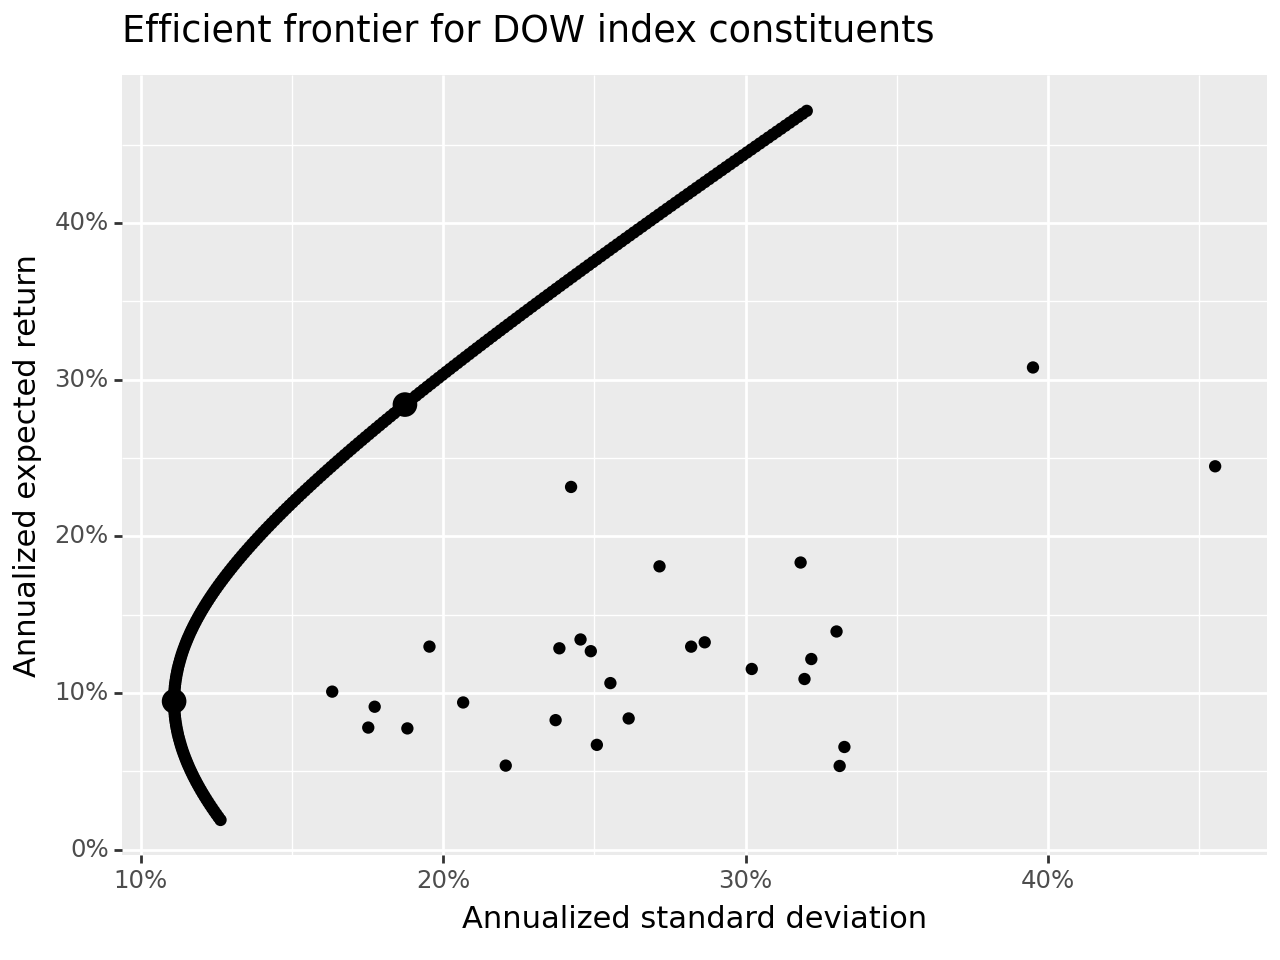

In [27]:
mvp_return = (mu.T @ mvp_weights)*length_year
mvp_volatility = (np.sqrt(mvp_weights.T @ sigma @ mvp_weights)* 
                  np.sqrt(length_year))
efp_return = mu_bar*length_year
efp_volatility = (np.sqrt(efp_weights.T @ sigma @ efp_weights)* 
                  np.sqrt(length_year))

res_figure = (
  ggplot(res, aes(x="sd", y="mu")) +
  geom_point() +
  geom_point(
    pd.DataFrame({"mu": [mvp_return, efp_return],
                  "sd": [mvp_volatility, efp_volatility]}),
    size=4
  ) +
  geom_point(
    pd.DataFrame({"mu": mu*length_year,
                  "sd": np.sqrt(np.diag(sigma))*np.sqrt(length_year)})
  ) +
  labs(x="Annualized standard deviation",
       y="Annualized expected return",
       title="Efficient frontier for DOW index constituents") +
  scale_x_continuous(labels=percent_format()) +
  scale_y_continuous(labels=percent_format())
)
res_figure.draw()